In [9]:
import pandas
import scipy
import sklearn
import keras
import tensorflow

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GroupKFold


keras.__version__

'3.0.5'

In [10]:
from tensorflow.keras import backend as K

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [11]:
folder_path = 'C:\\Users\\aoife\Documents\\Project\\filtered_data\\'

#dataset = pandas.read_csv(folder_path + '11-03-minmax_normalised_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'steps_per_hour', 'totalDistance', 'dwrTotalDuration', 'dist_per_hour', 'ssq_score', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'usual_wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons', 'trouble_falling_asleep', 'time_falling_asleep', 'wake_ups', 'total_time_awake', 'total_minutes_asleep'])

dataset = pandas.read_csv(folder_path + 'normalised-timed-activity-data.csv', usecols=['participantId', 'ssq_score', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr_morning', 'max_hr_morning', 'min_hr_morning', 'mean_hr_afternoon', 'max_hr_afternoon', 'min_hr_afternoon', 'mean_hr_evening', 'max_hr_evening', 'min_hr_evening', 'mean_hr_night', 'max_hr_night', 'min_hr_night', 'morningStepsTotal', 'afternoonStepsTotal', 'eveningStepsTotal', 'nightStepsTotal', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'morningDistance', 'afternoonDistance', 'eveningDistance', 'nightDistance'])

# split into input (X) and output (Y) variables
X = dataset[['bodyMass_kg', 'height_m', 'bmi', 'mean_hr_morning', 'max_hr_morning', 'min_hr_morning', 'mean_hr_afternoon', 'max_hr_afternoon', 'min_hr_afternoon', 'mean_hr_evening', 'max_hr_evening', 'min_hr_evening', 'mean_hr_night', 'max_hr_night', 'min_hr_night', 'morningStepsTotal', 'afternoonStepsTotal', 'eveningStepsTotal', 'nightStepsTotal', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'morningDistance', 'afternoonDistance', 'eveningDistance', 'nightDistance']].values
#X = dataset[['bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'steps_per_hour', 'totalDistance', 'dwrTotalDuration', 'dist_per_hour', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons', 'trouble_falling_asleep', 'time_falling_asleep', 'wake_ups', 'total_time_awake', 'total_minutes_asleep']].values
y = dataset['ssq_score'].values


In [12]:
gkf = GroupKFold(n_splits=5)

groups = dataset['participantId'].values

In [13]:
l1size = 3

In [14]:
print(len(X), len(y))


1041 1041


In [15]:
train_rmse_histories = []
test_rmse_histories = []

train_mse_histories = []
test_mse_histories = []

In [16]:
curr_fold = 0

for train_idx, test_idx in gkf.split(X, y, groups):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    curr_fold+=1

    model = Sequential()
    model.add(Dense(l1size, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='linear'))

    optm = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)
    model.compile(optimizer=optm, loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

    history = model.fit(X_train, y_train, epochs=400, batch_size=1, validation_data=(X_test, y_test))

    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)

    train_rmse_histories.append(history.history['root_mean_squared_error'])
    test_rmse_histories.append(history.history['val_root_mean_squared_error'])

    train_mse_histories.append(history.history['loss'])
    test_mse_histories.append(history.history['val_loss'])

    if curr_fold == 1:
        print("Data points in fold 1:", test_idx)
    elif curr_fold ==2:
        print("Data points in fold 2:", test_idx)
    elif curr_fold ==3:
        print("Data points in fold 3:", test_idx)
    elif curr_fold ==4:
        print("Data points in fold 4:", test_idx)
    elif curr_fold ==5:
        print("Data points in fold 5:", test_idx)

Epoch 1/400


c:\Users\aoife\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


832/832 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1154 - root_mean_squared_error: 0.3389 - val_loss: 0.0955 - val_root_mean_squared_error: 0.3090
Epoch 2/400
832/832 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - loss: 0.0972 - root_mean_squared_error: 0.3114 - val_loss: 0.0911 - val_root_mean_squared_error: 0.3018
Epoch 3/400
832/832 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - loss: 0.1003 - root_mean_squared_error: 0.3162 - val_loss: 0.1187 - val_root_mean_squared_error: 0.3446
Epoch 4/400
832/832 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - loss: 0.0961 - root_mean_squared_error: 0.3097 - val_loss: 0.1202 - val_root_mean_squared_error: 0.3467
Epoch 5/400
832/832 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0929 - root_mean_squared_error: 0.3043 - val_loss: 0.0692 - val_root_mean_squared_error: 0.2630
Epoch 6/400
832/832 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - loss: 0.0983 - root_mean_squared_error: 0.3130 - val_loss: 0.0770 - val_root_mean_squared_error: 0.2776
Epoch 7/400
832/832 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/

In [17]:
from matplotlib import pyplot as plt

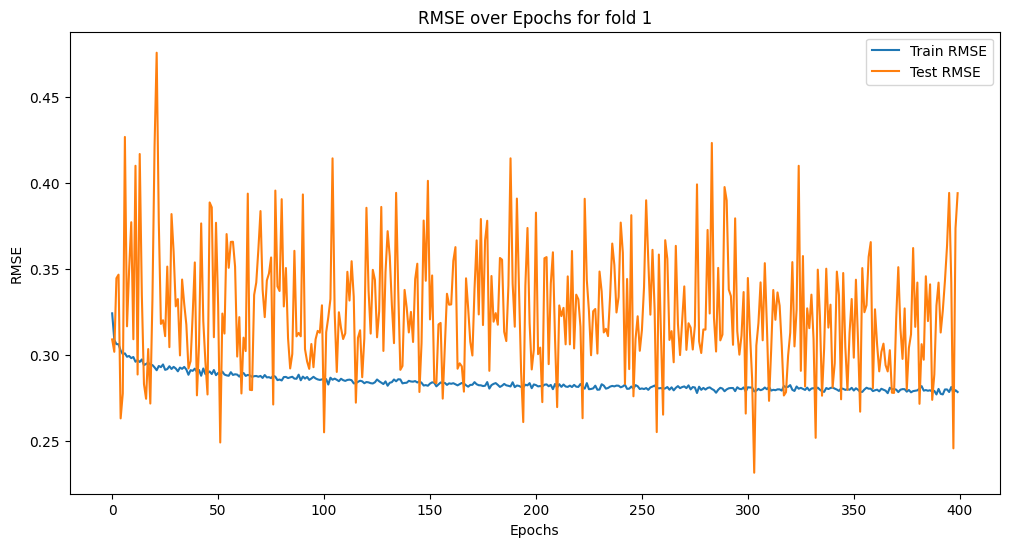

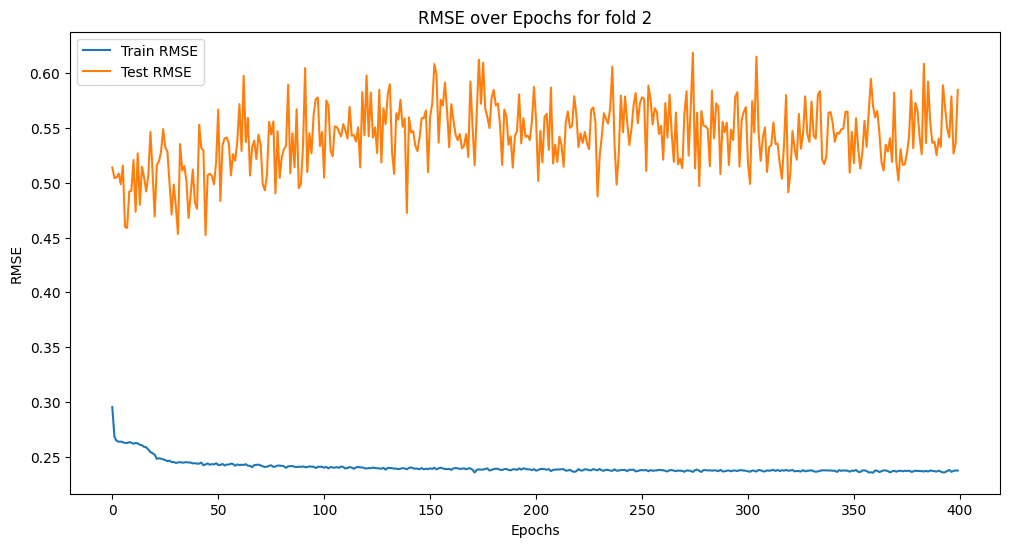

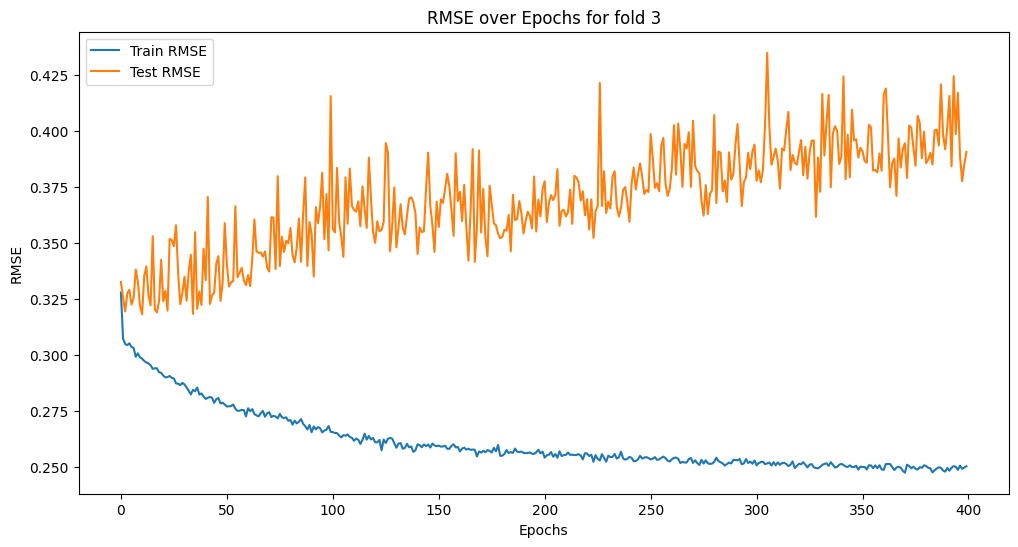

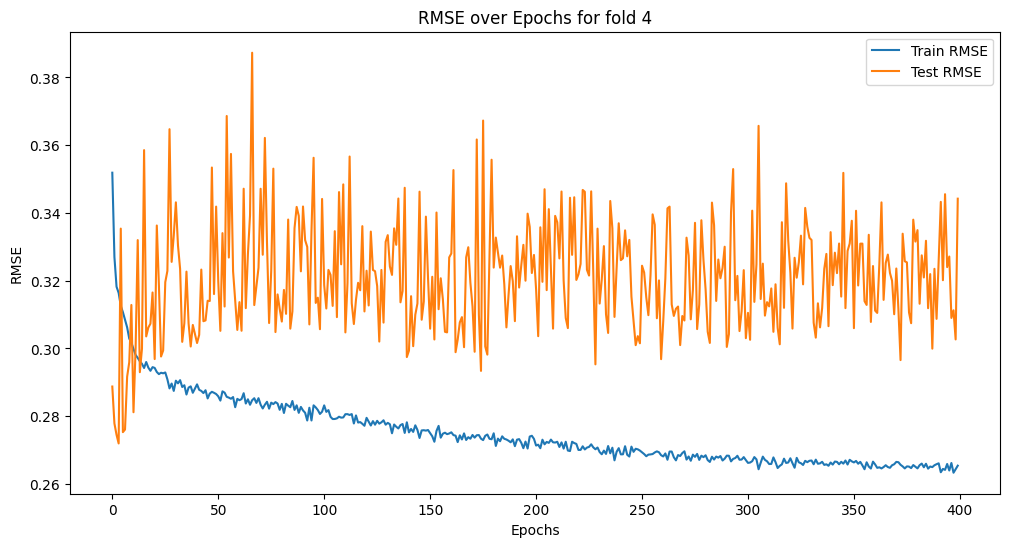

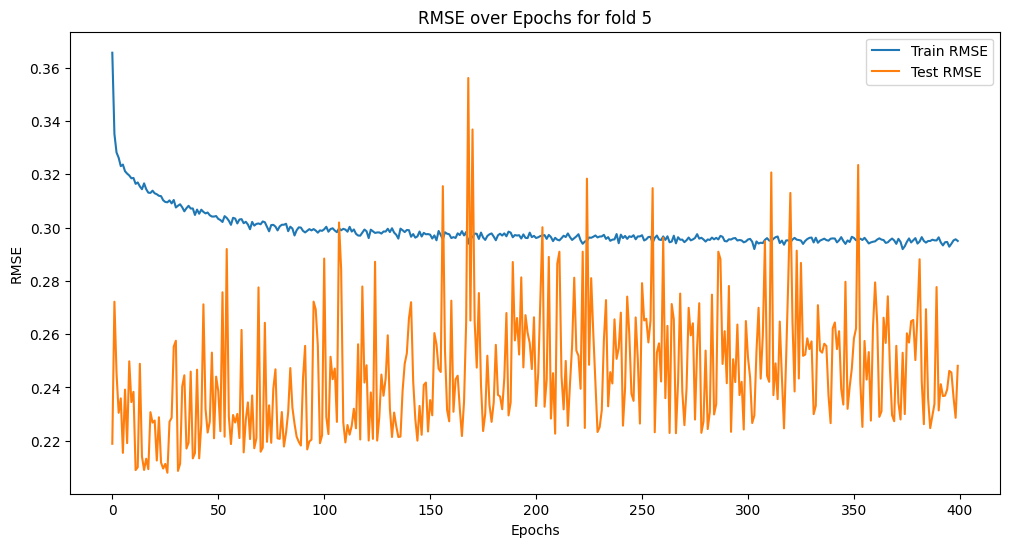

In [18]:
for i, (train_rmse, test_rmse) in enumerate(zip(train_rmse_histories, test_rmse_histories), start=1):
    plt.figure(figsize=(12, 6))
    plt.plot(train_rmse, label='Train RMSE')
    plt.plot(test_rmse, label='Test RMSE')
    plt.title(f'RMSE over Epochs for fold {i}')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

0.2718319300413132
0.3605487001016736


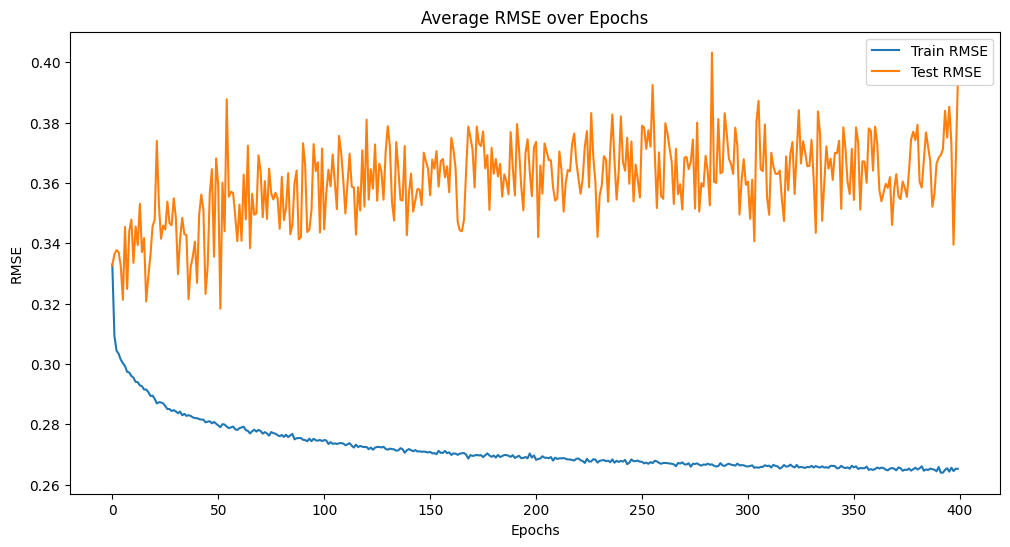

In [43]:
import numpy as np

train_rmse_avg = np.mean(train_rmse_histories, axis=0)
test_rmse_avg = np.mean(test_rmse_histories, axis=0)

print(np.mean(train_rmse_histories))
print(np.mean(test_rmse_histories))


plt.figure(figsize=(12, 6))
plt.plot(train_rmse_avg, label='Train RMSE')
plt.plot(test_rmse_avg, label='Test RMSE')
plt.title('Average RMSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()


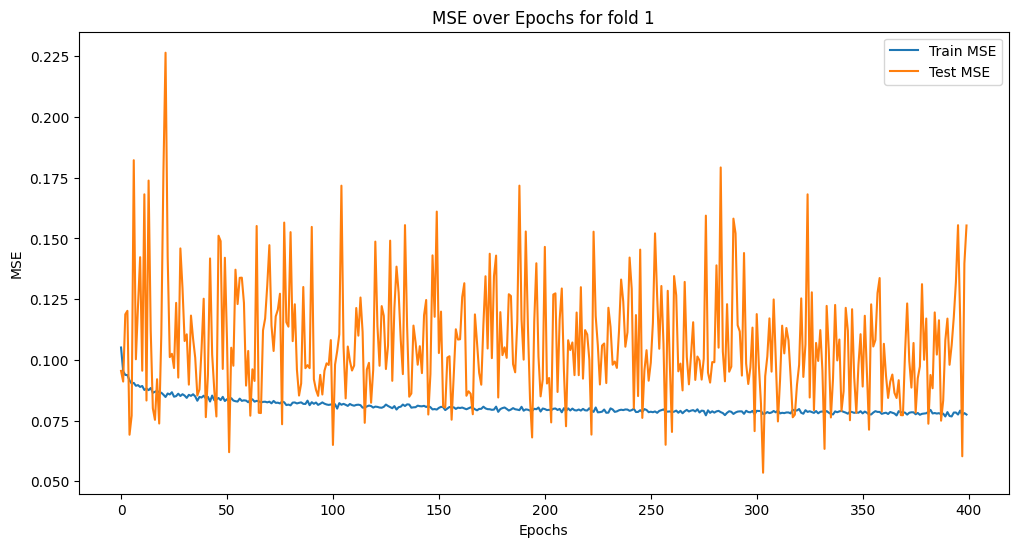

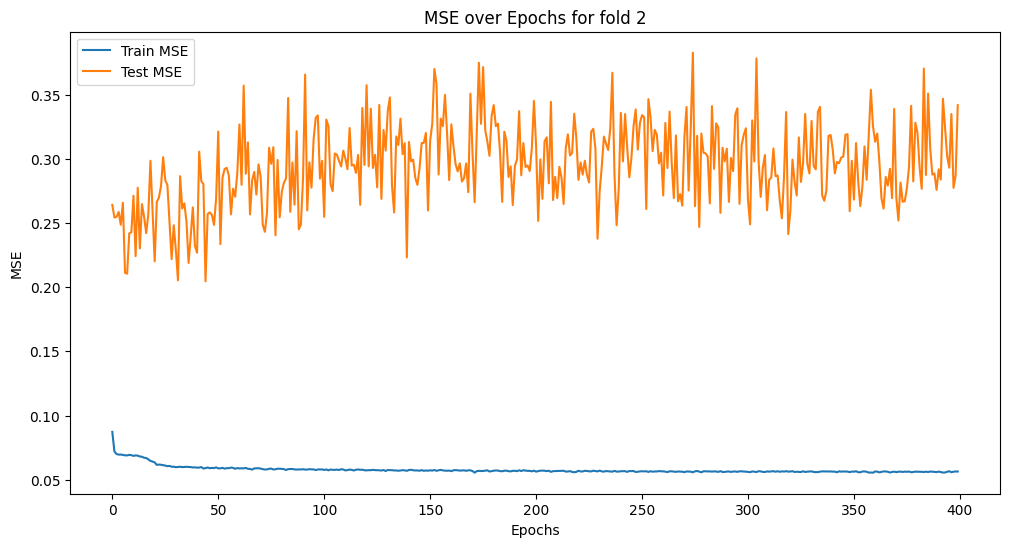

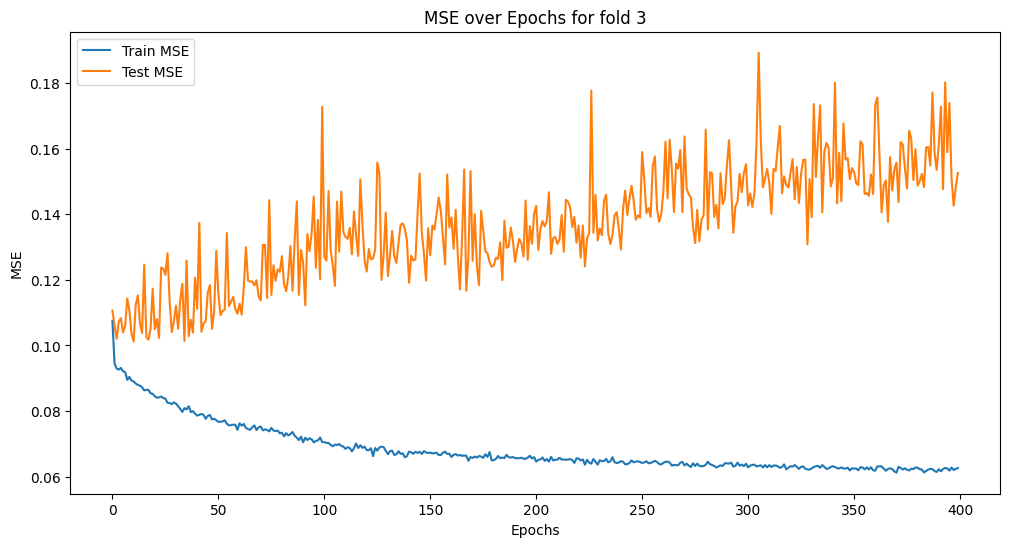

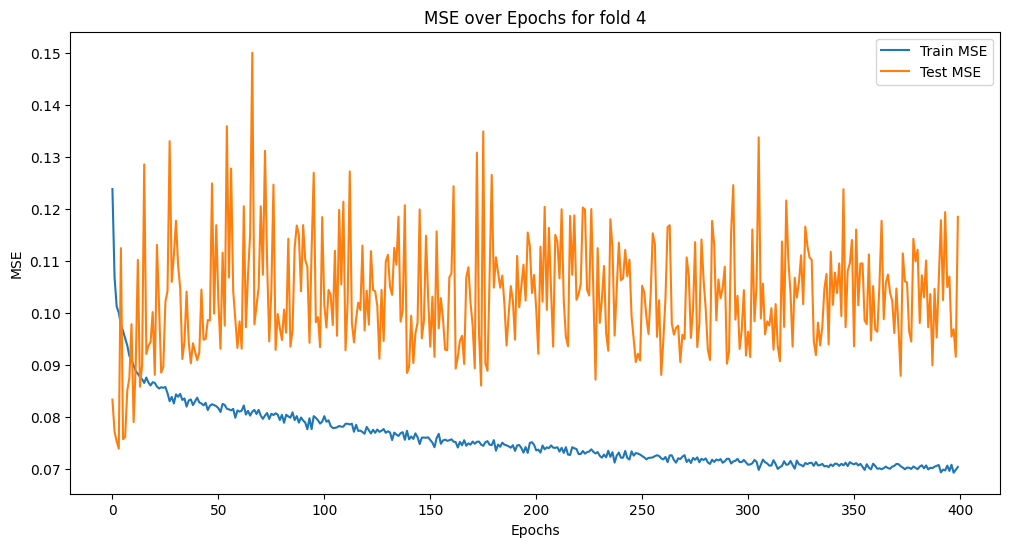

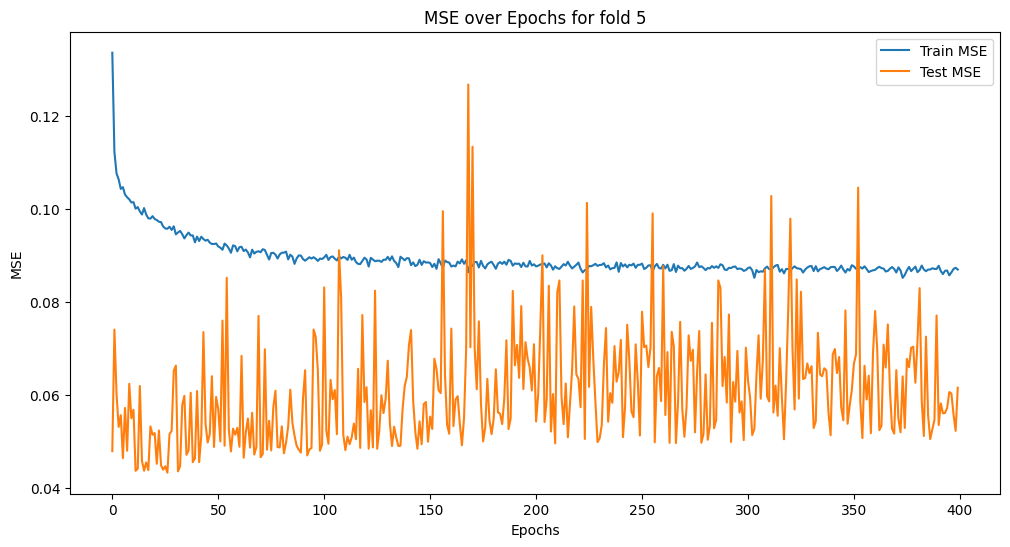

In [33]:
from matplotlib import pyplot as plt
for i, (train_mse, test_mse) in enumerate(zip(train_mse_histories, test_mse_histories), start=1):
    plt.figure(figsize=(12,6))
    plt.plot(train_mse, label='Train MSE')
    plt.plot(test_mse, label='Test MSE')
    plt.title(f'MSE over Epochs for fold {i}')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()